## Aplicação de algorimos de clusterização como K-Means para datasets ou conjuntos de dados que são multidimensionais. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

**Conjunto de dados:**

Top songs by Billboard and by each year- Kaggle

https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year    

In [2]:
dataset_filename = 'datasets/top10s.csv'

In [3]:
df_spotify_top10 = pd.read_csv(dataset_filename, engine='python', index_col=0)

Dimensões:

In [4]:
df_spotify_top10.shape

(603, 14)

Atributos:

In [5]:
df_spotify_top10.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [6]:
df_spotify_top10.sample(4)

title          artist  top genre  year  bpm  nrgy  dnce  \
42   Doesn't Mean Anything     Alicia Keys    hip pop  2010  104    41    71   
72            On The Floor  Jennifer Lopez  dance pop  2011  130    78    73   
511              I Like It         Cardi B        pop  2018  136    73    82   
29           Teenage Dream      Katy Perry  dance pop  2010  120    80    72   

     dB  live  val  dur  acous  spch  pop  
42   -7    10   10  273      4     3   57  
72   -5     7   57  285     11     5   69  
511  -4    37   65  253     10    13   85  
29   -5    13   59  228      2     4   63

### Tratamento dos dados

Limpeza dos dados:

Existem dados faltantes (missing data ou nulos)?

In [7]:
df_spotify_top10 = df_spotify_top10[~(df_spotify_top10 == 0).any(axis=1)]

In [8]:
df_spotify_top10.shape

(527, 14)

### Organização dos dados

In [9]:
df_spotify_top10 = df_spotify_top10[['nrgy','dnce','live','val','acous','spch']]

In [10]:
df_spotify_top10.sample(4)

nrgy  dnce  live  val  acous  spch
354    78    57    33   28      2     3
556    60    66    11   45     10     6
377    53    63    18   42     40     4
241    92    79     8   66      1    25

In [11]:
X = df_spotify_top10[['nrgy','dnce','live','val','acous','spch']].values

Elbow Method

In [12]:
k = 6

In [13]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=k)
visualizer = KElbowVisualizer(model)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

Atualização do numero de clusters

In [14]:
k = visualizer.elbow_value_

### Execução

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
y_kmeans = kmeans.fit_predict(X)

In [109]:
#kmeans.cluster_centers_

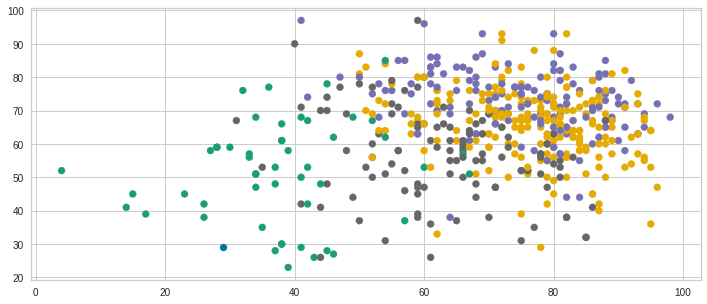

In [110]:
plt.figure(figsize=(12,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='Dark2')
plt.scatter(r, r)

In [123]:
# cluster index for each observation 
centers = kmeans.cluster_centers_ 

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,100])

# cluster center coordinates 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=15, cmap='summer')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [124]:
centroids = list()
for i in range(k):
    centroids.append([centers[:, 0][i], centers[:, 1][i]])

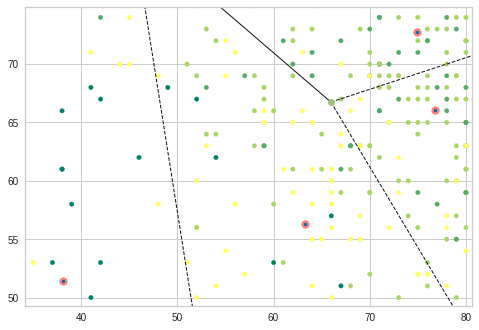

In [126]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(centroids)
voronoi_plot_2d(vor)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=60, alpha=0.5)

plt.show()

In [97]:
print(kmeans.inertia_)

386420.53471931623


/home/ronildo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


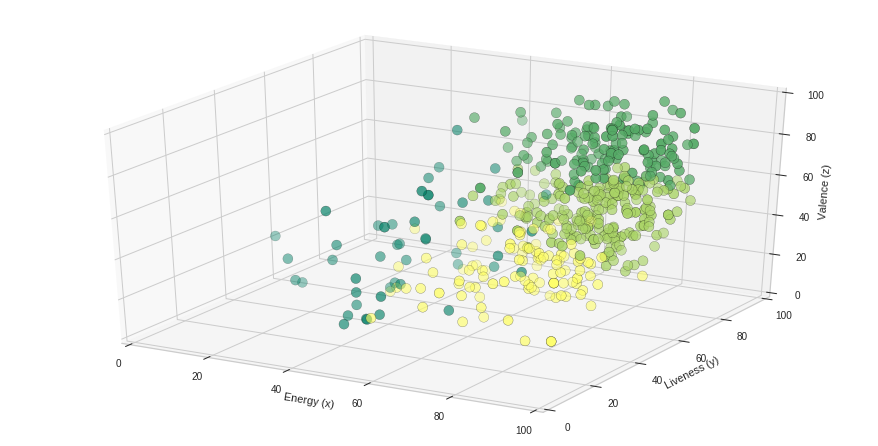

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = Axes3D(fig)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0,100)
ax.set_zlim3d(0,100)

# ['nrgy','dnce','live','val','acous','spch']
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=y_kmeans, edgecolor='k', cmap='summer', s=100)

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Energy (x)')
ax.set_ylabel('Liveness (y)')
ax.set_zlabel('Valence (z)')

fig.show()

/home/ronildo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


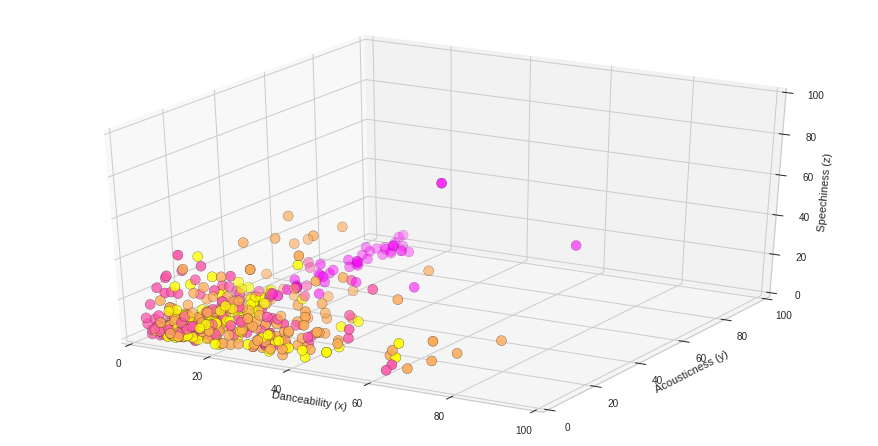

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = Axes3D(fig)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0,100)
ax.set_zlim3d(0,100)

# ['nrgy','dnce','live','val','acous','spch']
ax.scatter(X[:, 2], X[:, 4], X[:, 5], c=y_kmeans, edgecolor='k', cmap='spring', s=100)

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Danceability (x)')
ax.set_ylabel('Acousticness (y)')
ax.set_zlabel('Speechiness (z)')

fig.show()

Referências

- https://www.polymorphe.org/index.php/k-means-clustering-part-1
- https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
- https://www.kaggle.com/laowingkin/song-text-mining-and-clustering
- http://organizeyourmusic.playlistmachinery.com/
- https://www.kaggle.com/edenbd/150k-lyrics-labeled-with-spotify-valence
- https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres
- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
- https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
- https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year